In [1]:
from fpdf import FPDF

In [2]:
pdf = FPDF()
pdf.add_page()
pdf.output('example1.pdf', 'F')

''

In [3]:
# Margin
m = 10 
# Page width: Width of A4 is 210mm
pw = 210 - 2*m
# Cell height
ch = 50
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', '', 12)
pdf.cell(w=0, h=ch, txt="Cell 1", border=1, ln=1)
pdf.cell(w=(pw/2), h=ch, txt="Cell 2a", border=1, ln=0)
pdf.cell(w=(pw/2), h=ch, txt="Cell 2b", border=1, ln=1)
pdf.cell(w=(pw/3), h=ch, txt="Cell 3a", border=1, ln=0)
pdf.cell(w=(pw/3), h=ch, txt="Cell 3b", border=1, ln=0)
pdf.cell(w=(pw/3), h=ch, txt="Cell 3c", border=1, ln=1)
pdf.cell(w=(pw/3), h=ch, txt="Cell 4a", border=1, ln=0)
pdf.cell(w=(pw/3)*2, h=ch, txt="Cell 4b", border=1, ln=1)
pdf.set_xy(x=10, y= 220) # or use pdf.ln(50)
pdf.cell(w=0, h=ch, txt="Cell 5", border=1, ln=1)
pdf.output('example2.pdf', 'F')

''

In [4]:
# Custom class to overwrite the header and footer methods
class PDF(FPDF):
    def __init__(self):
        super().__init__()
    def header(self):
        self.set_font('Arial', '', 12)
        self.cell(0, 10, 'Header', 1, 1, 'C')
    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', '', 12)
        self.cell(0, 10, 'Footer', 1, 0, 'C')
pdf = PDF() # Instance of custom class
pdf.add_page()
pdf.set_font('Arial', '', 12)
pdf.cell(w=0, h=255, txt = "Body", border = 1, ln = 1, align = 'C')
pdf.output('example3.pdf', 'F')

''

In [5]:
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', '', 16)
pdf.cell(w=0, h=10, txt="This is regular text.", ln=1)
pdf.set_font('Arial', 'B', 16)
pdf.cell(w=0, h=10, txt="This is bold text.", ln=1)
pdf.set_font('Arial', 'I', 16)
pdf.cell(w=0, h=10, txt="This is italic text.", ln=1)
pdf.set_font('Arial', '', 16) # Reset text back to regular
pdf.cell(w=0, h=10, txt="This is left aligned text.", ln=1,   
         align='L')
pdf.cell(w=0, h=10, txt="This is center aligned text.", ln=1,
         align='C')
pdf.cell(w=0, h=10, txt="This is right aligned text.", ln=1,
         align='R')
pdf.set_fill_color(r= 0, g= 128, b = 0)
pdf.cell(w=0, h=10, txt="This is text with filled background.", ln=1,
         fill=True)
pdf.set_text_color(r= 0, g= 128, b = 0)
pdf.cell(w=0, h=10, txt="This is colored text.", ln=1)
pdf.output('example4.pdf', 'F')

''

In [6]:
import lorem # Use this package to showcase long texts
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', '', 16)
pdf.cell(w=0, h=50, txt="This and the below cells are regular cells." , border=1, ln=1)
pdf.cell(w=0, h=50, txt="Example: " + lorem.text(), border=1, ln=1)
pdf.multi_cell(w=0, h=50, txt="This and the below cells are multi cells.", border=1, )
pdf.multi_cell(w=0, h=5, txt="Example: " + lorem.text(), border=1, )
pdf.output('example5.pdf', 'F')

''

In [7]:
# cell height
ch = 8
class PDF(FPDF):
    def __init__(self):
        super().__init__()
    def header(self):
        self.set_font('Arial', '', 12)
        self.cell(0, 8, 'Header', 0, 1, 'C')
    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', '', 12)
        self.cell(0, 8, f'Page {self.page_no()}', 0, 0, 'C')
pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 24)
pdf.cell(w=0, h=20, txt="Title", ln=1)
pdf.set_font('Arial', '', 16)
pdf.cell(w=30, h=ch, txt="Date: ", ln=0)
pdf.cell(w=30, h=ch, txt="01/01/2022", ln=1)
pdf.cell(w=30, h=ch, txt="Author: ", ln=0)
pdf.cell(w=30, h=ch, txt="Max Mustermann", ln=1)
pdf.ln(ch)
pdf.multi_cell(w=0, h=5, txt=lorem.paragraph())
pdf.ln(ch)
pdf.multi_cell(w=0, h=5, txt=lorem.paragraph())
pdf.output('example6.pdf', 'F')

''

In [8]:
import pandas as pd
df = pd.DataFrame(
          {'feature 1' : ['cat 1', 'cat 2', 'cat 3', 'cat 4'],
           'feature 2' : [400, 300, 200, 100]
          })

In [9]:
df

,feature 1,feature 2
0,cat 1,400
1,cat 2,300
2,cat 3,200
3,cat 4,100


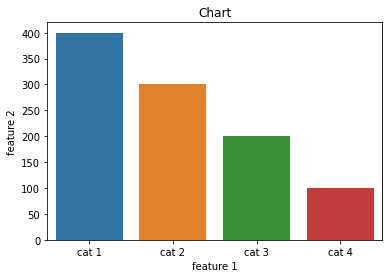

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize = (6, 4))
sns.barplot(data =  df, x = 'feature 1', y = 'feature 2')
plt.title("Chart")
plt.savefig('example_chart.png', 
           transparent=False,  
           facecolor='white', 
           bbox_inches="tight")

In [11]:
pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 24)
pdf.cell(w=0, h=20, txt="Title", ln=1)
pdf.set_font('Arial', '', 16)
pdf.cell(w=30, h=ch, txt="Date: ", ln=0)
pdf.cell(w=30, h=ch, txt="01/01/2022", ln=1)
pdf.cell(w=30, h=ch, txt="Author: ", ln=0)
pdf.cell(w=30, h=ch, txt="Max Mustermann", ln=1)
pdf.ln(ch)
pdf.multi_cell(w=0, h=5, txt=lorem.paragraph())
pdf.image('./example_chart.png', 
          x = 10, y = None, w = 100, h = 0, type = 'PNG')
pdf.ln(ch)
pdf.multi_cell(w=0, h=5, txt=lorem.paragraph())
pdf.output('example7.pdf', 'F')

''

In [12]:
pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 24)
pdf.cell(w=0, h=20, txt="Title", ln=1)
pdf.set_font('Arial', '', 16)
pdf.cell(w=30, h=ch, txt="Date: ", ln=0)
pdf.cell(w=30, h=ch, txt="01/01/2022", ln=1)
pdf.cell(w=30, h=ch, txt="Author: ", ln=0)
pdf.cell(w=30, h=ch, txt="Max Mustermann", ln=1)
pdf.ln(ch)
pdf.multi_cell(w=0, h=5, txt=lorem.paragraph())
pdf.image('./example_chart.png', x = 10, y = None, w = 100, h = 0, type = 'PNG', link = '')
pdf.ln(ch)
pdf.multi_cell(w=0, h=5, txt=lorem.paragraph())
pdf.ln(ch)
# Table Header
pdf.set_font('Arial', 'B', 16)
pdf.cell(w=40, h=ch, txt='Feature 1', border=1, ln=0, align='C')
pdf.cell(w=40, h=ch, txt='Feature 2', border=1, ln=1, align='C')
# Table contents
pdf.set_font('Arial', '', 16)
for i in range(0, len(df)):
    pdf.cell(w=40, h=ch, 
             txt=df['feature 1'].iloc[i], 
             border=1, ln=0, align='C')
    pdf.cell(w=40, h=ch, 
             txt=df['feature 2'].iloc[i].astype(str), 
             border=1, ln=1, align='C')
pdf.output('example8.pdf', 'F')

''